# Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import re

In [2]:
main_data = pd.read_csv("train.csv", index_col="PassengerId")
main_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
# Making communicative reference table.
variables = main_data.columns
definitions = ["Survival", "ticket class", "name", "sex", "age in years",
               "# of siblings/spouses aboard the Titanic",
               "# of parents/children aboard the Titanic", "ticket number", "passenger fare", "cabin number",
               "port of embarkation"]
keys = ["0 = No, 1 = Yes", "1st, 2nd, 3rd", "","", "", "", "", "", "", "", "Cherbourg, Queenstown, Southampton"]
len(variables), len(definitions), len(keys)

(11, 11, 11)

In [4]:
ref_table = pd.DataFrame([definitions, keys], columns=variables, index=["Definitions", "Keys"]).T
ref_table

,Definitions,Keys
Survived,Survival,"0 = No, 1 = Yes"
Pclass,ticket class,"1st, 2nd, 3rd"
Name,name,
Sex,sex,
Age,age in years,
SibSp,# of siblings/spouses aboard the Titanic,
Parch,# of parents/children aboard the Titanic,
Ticket,ticket number,
Fare,passenger fare,
Cabin,cabin number,


# Analysis

In [5]:
main_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Missing data:
main_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# Number of people died vs. number of people survived:
main_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Using feature encoding and regex to get prepositions of names:
prepositions = list()
for person in main_data["Name"]:
    preposition = re.findall("[A-Z][a-z]+\.", person)
    if preposition not in prepositions:
        prepositions.append(preposition)

prepositions = np.array(prepositions).reshape(len(prepositions))
print(f"We have {len(prepositions)} prepositions: ")
print(prepositions)

We have 17 prepositions: 
['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']


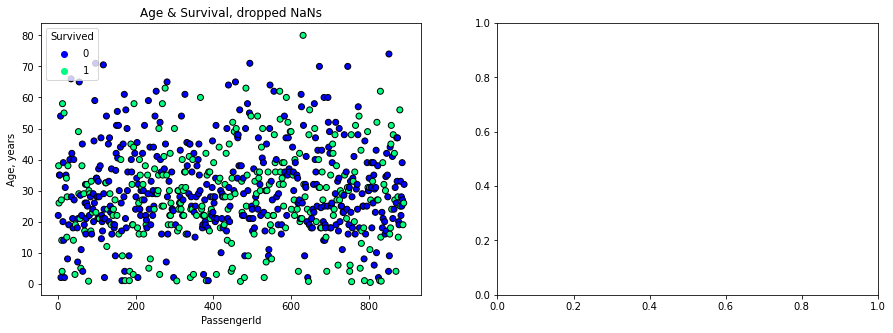

In [9]:
# Analyzing the ages of people (using scatterplot):

fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15, 5))

# 1. Dropping NaNs:

y = main_data.dropna(subset=["Age"])["Age"]
x = main_data.dropna(subset=["Age"]).index
c = main_data.dropna(subset=["Age"])["Survived"]

scatter1 = ax1.scatter(x=x, y=y, c=c, cmap='winter', edgecolors='black')
ax1.legend(*scatter1.legend_elements(), title="Survived", loc='upper left')
ax1.set(title="Age & Survival, dropped NaNs",
        ylabel="Age, years",
        xlabel="PassengerId");

There is almost no pattern. Except, most children (age 0-10) survived the titanic. It means that they did it probably with parents (or mother at least). Let's try this hypothesis.

In [10]:
ch_10 = main_data[main_data["Age"] <= 10]
ch_10.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
std,0.495015,0.573687,2.976117,1.605731,0.528691,24.807302
min,0.000000,1.000000,0.420000,0.000000,0.000000,8.516700
25%,0.000000,2.000000,2.000000,0.750000,1.000000,19.131225
50%,1.000000,3.000000,4.000000,1.000000,1.000000,27.000000
75%,1.000000,3.000000,7.000000,3.250000,2.000000,31.387500
max,1.000000,3.000000,10.000000,5.000000,2.000000,151.550000


At average children under 10 had about 1.8 sibsp feature and 1.4 parch. It means that children were preferred for escape. Also, they took up far less space than average person.

Let's check the average "Survived" for different age groups:

In [11]:
def check_age_score(min):
    df = main_data[main_data["Age"] >= min]
    for i in range(min, min+11, 1):
        df1 = df[df["Age"] <= i]
        print(f"Between {min} and {min+10} average for {i} years is: {df1['Survived'].mean()}")

for i in range(0, 80, 10):
    check_age_score(i)

Between 0 and 10 average for 0 years is: nan
Between 0 and 10 average for 1 years is: 0.8571428571428571
Between 0 and 10 average for 2 years is: 0.625
Between 0 and 10 average for 3 years is: 0.6666666666666666
Between 0 and 10 average for 4 years is: 0.675
Between 0 and 10 average for 5 years is: 0.7045454545454546
Between 0 and 10 average for 6 years is: 0.7021276595744681
Between 0 and 10 average for 7 years is: 0.68
Between 0 and 10 average for 8 years is: 0.6666666666666666
Between 0 and 10 average for 9 years is: 0.6129032258064516
Between 0 and 10 average for 10 years is: 0.59375
Between 10 and 20 average for 10 years is: 0.0
Between 10 and 20 average for 11 years is: 0.16666666666666666
Between 10 and 20 average for 12 years is: 0.2857142857142857
Between 10 and 20 average for 13 years is: 0.4444444444444444
Between 10 and 20 average for 14 years is: 0.4666666666666667
Between 10 and 20 average for 15 years is: 0.5238095238095238
Between 10 and 20 average for 16 years is: 0.44